<a href="https://colab.research.google.com/github/ziyasarican/PythonMachineLearning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

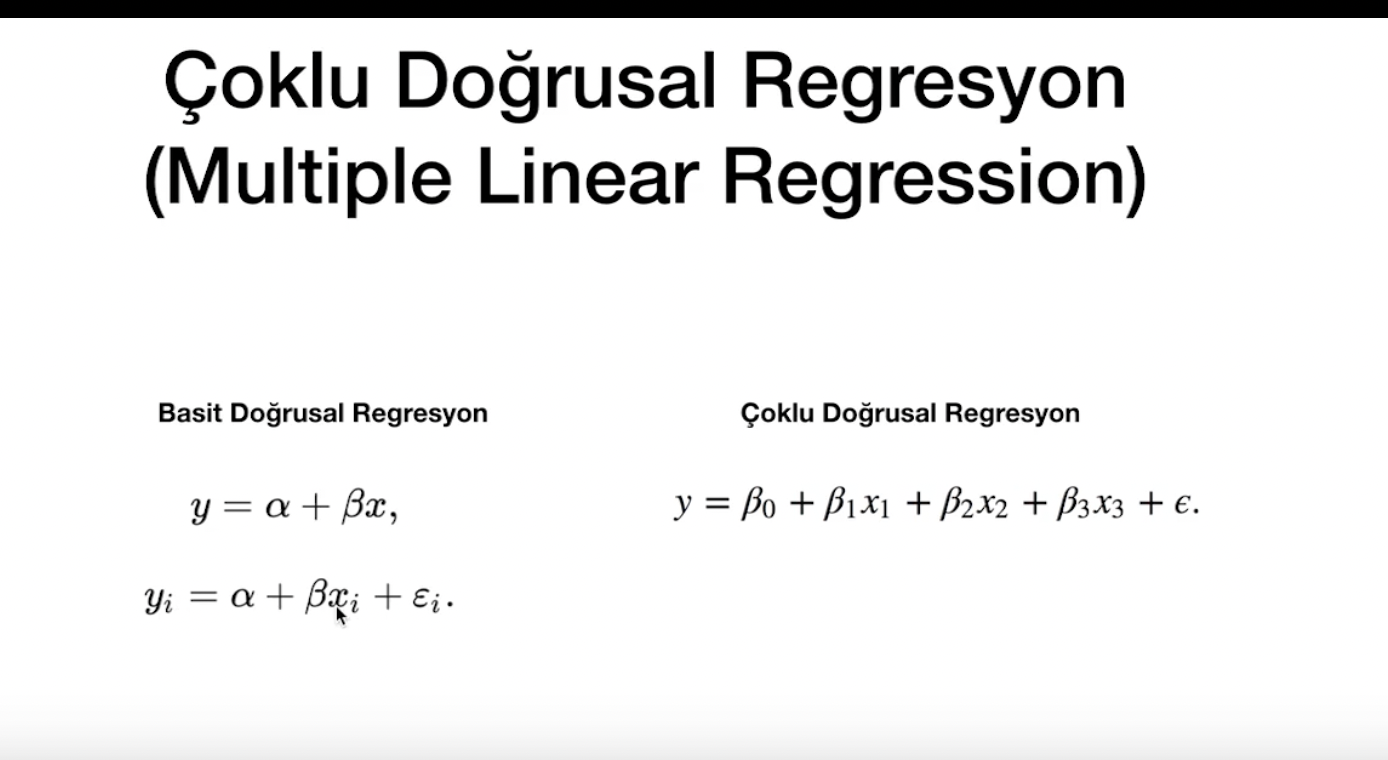

- Birden fazla değişkene bağlı olarak tahmin yapılmasıdır
- ε hata payıdır

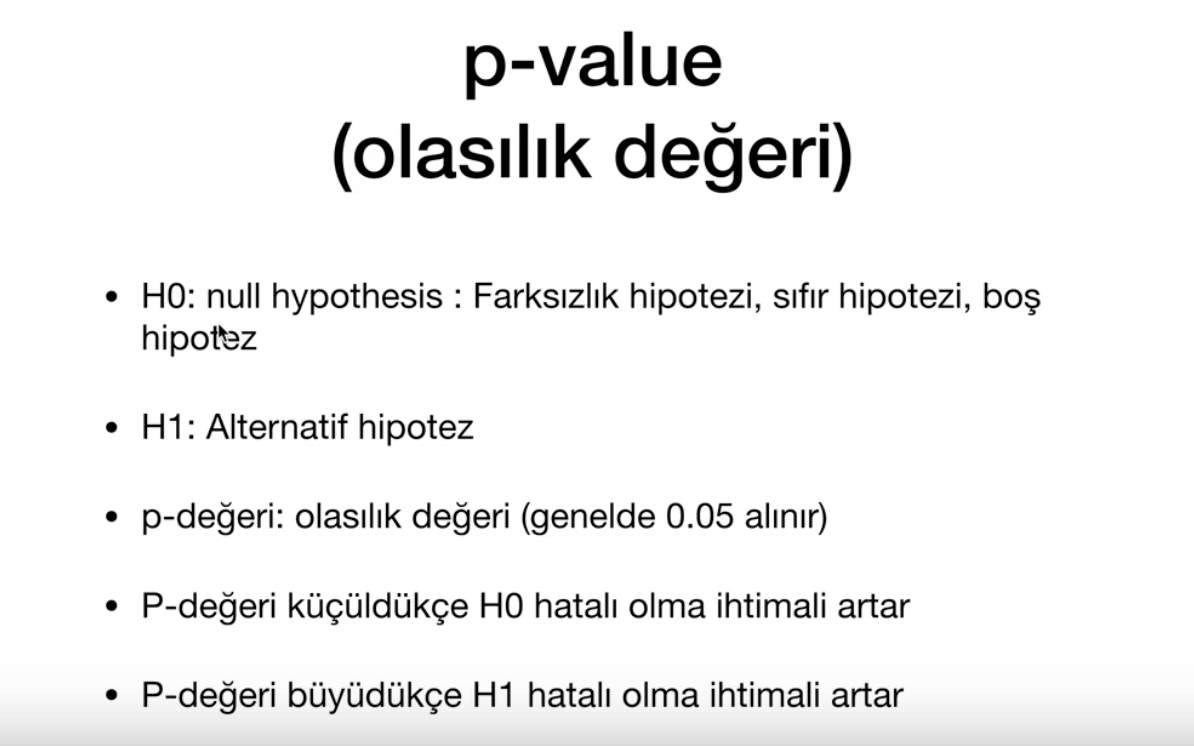

- Kurulan modelin kabul edilebilir olup olmadığını ölçmek için kullanılır.
- Bir H0 ve ona alternatif(zıt) H1 hipotezi ortaya atılır.
- Kurulan modellerde bir hata oranı olacaktır. Bu hata değeri p-value'den küçükse H1 doğrudur, değilse H2 doğrudur.

---
- Modeli kurarken bütün değişkenlerin mi alınacağı yoksa aralarından seçim mi yapılacağıyla alakalı farklı metotlar var.
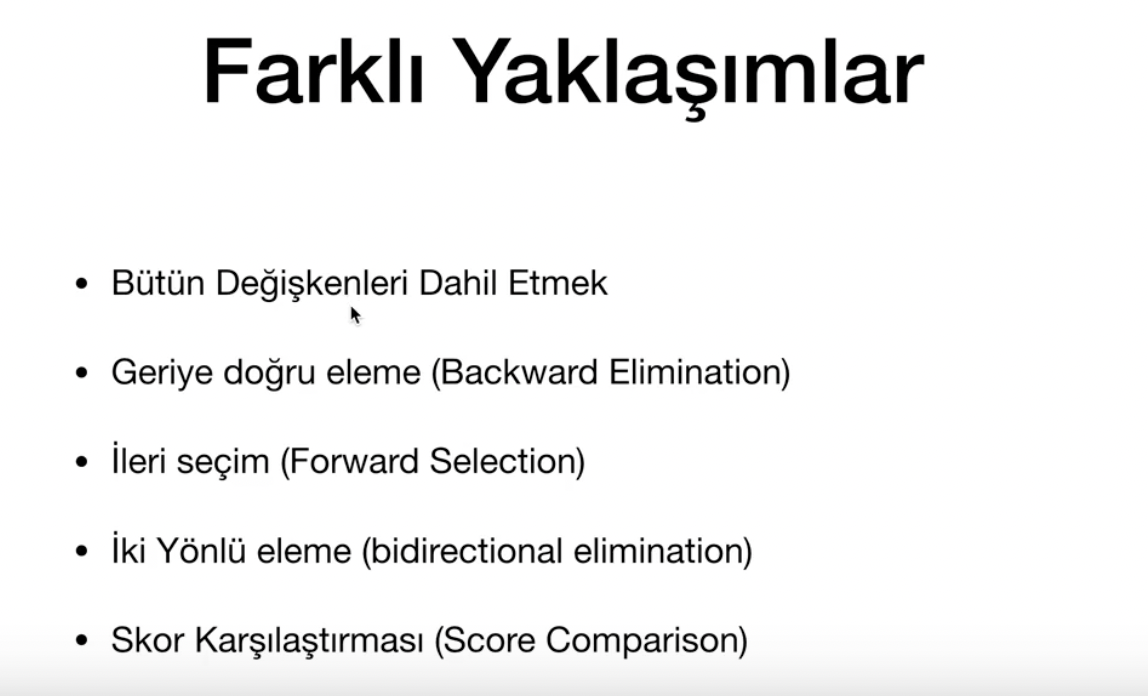


---


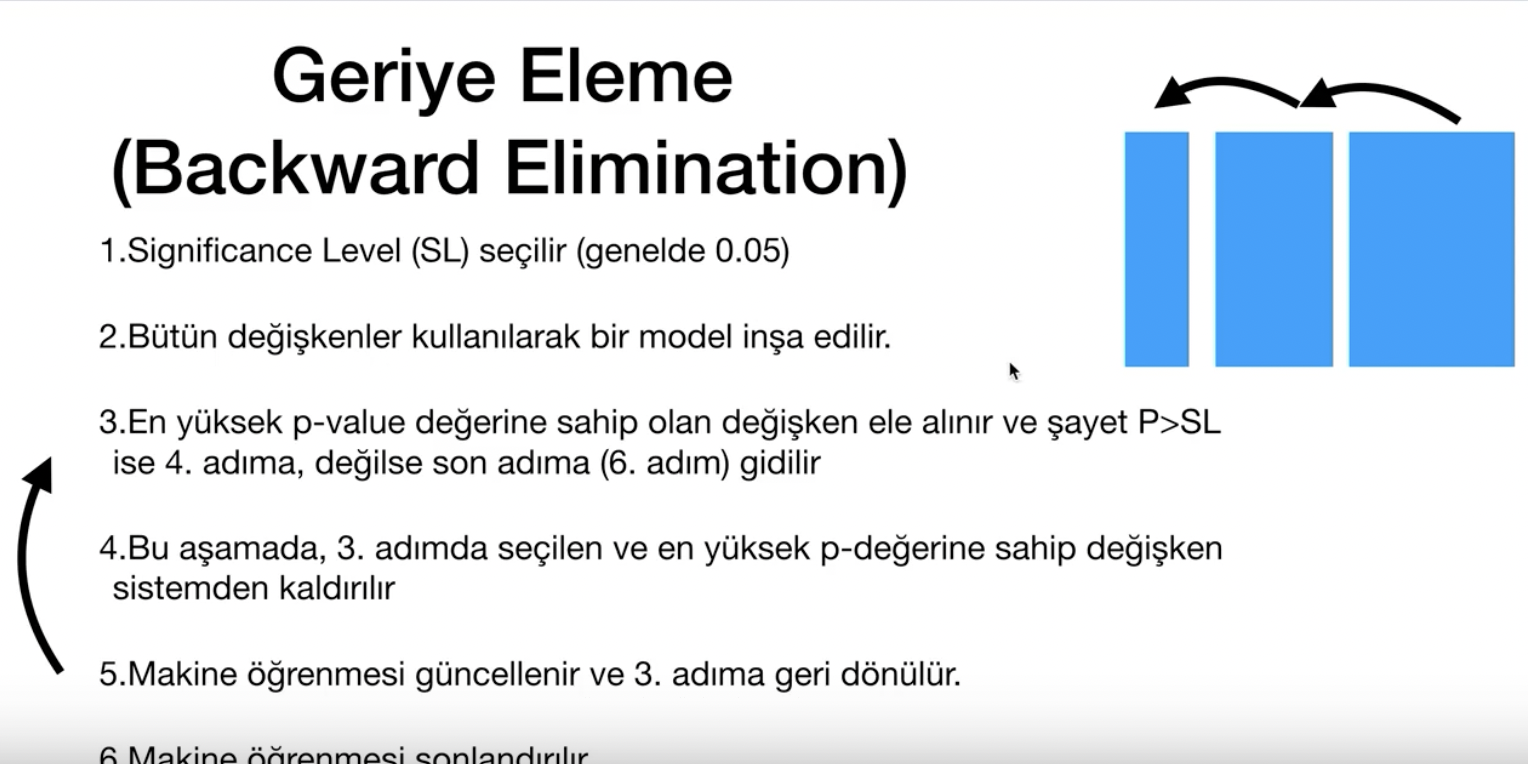

---
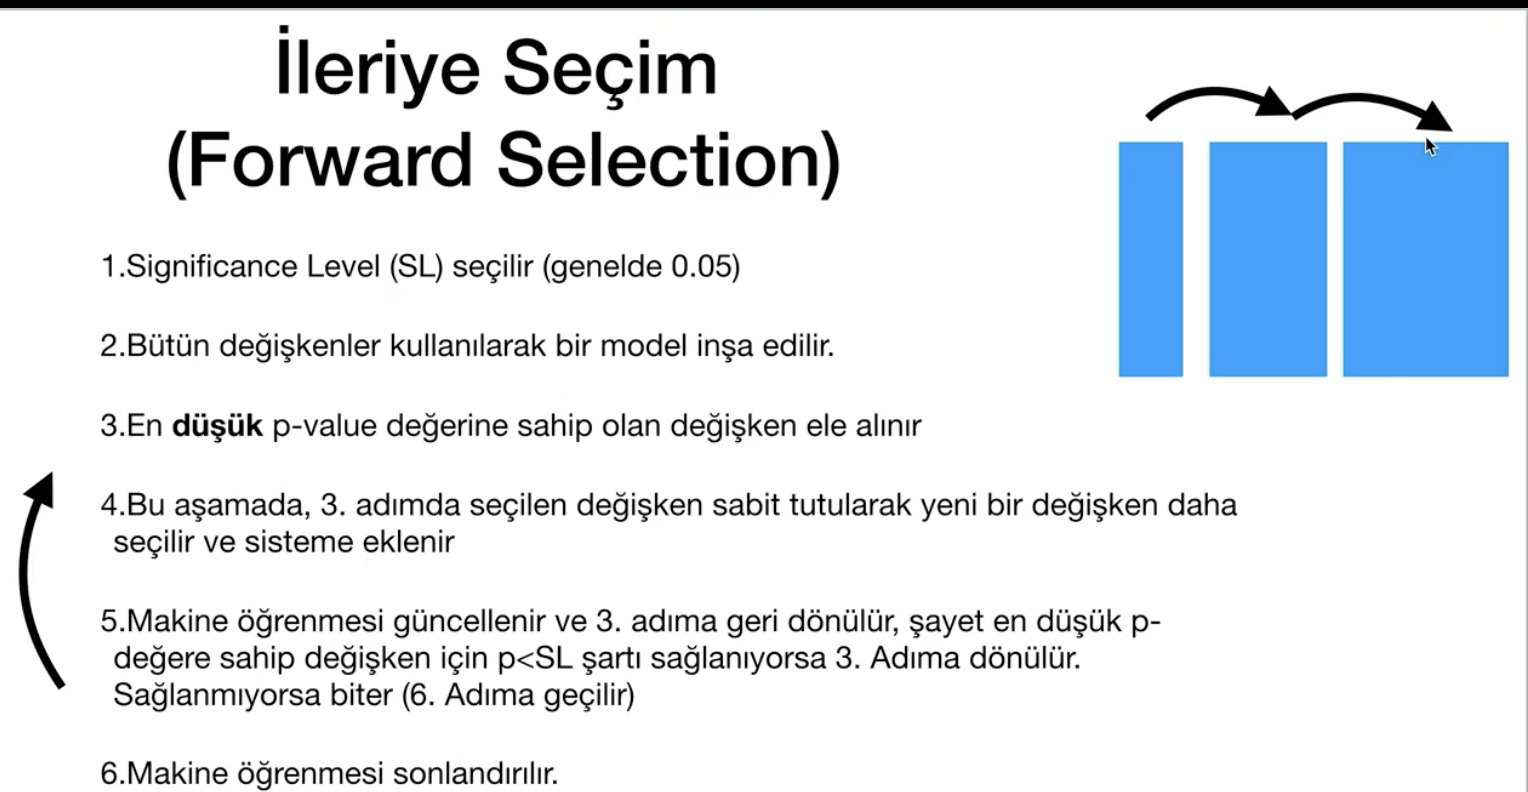

---
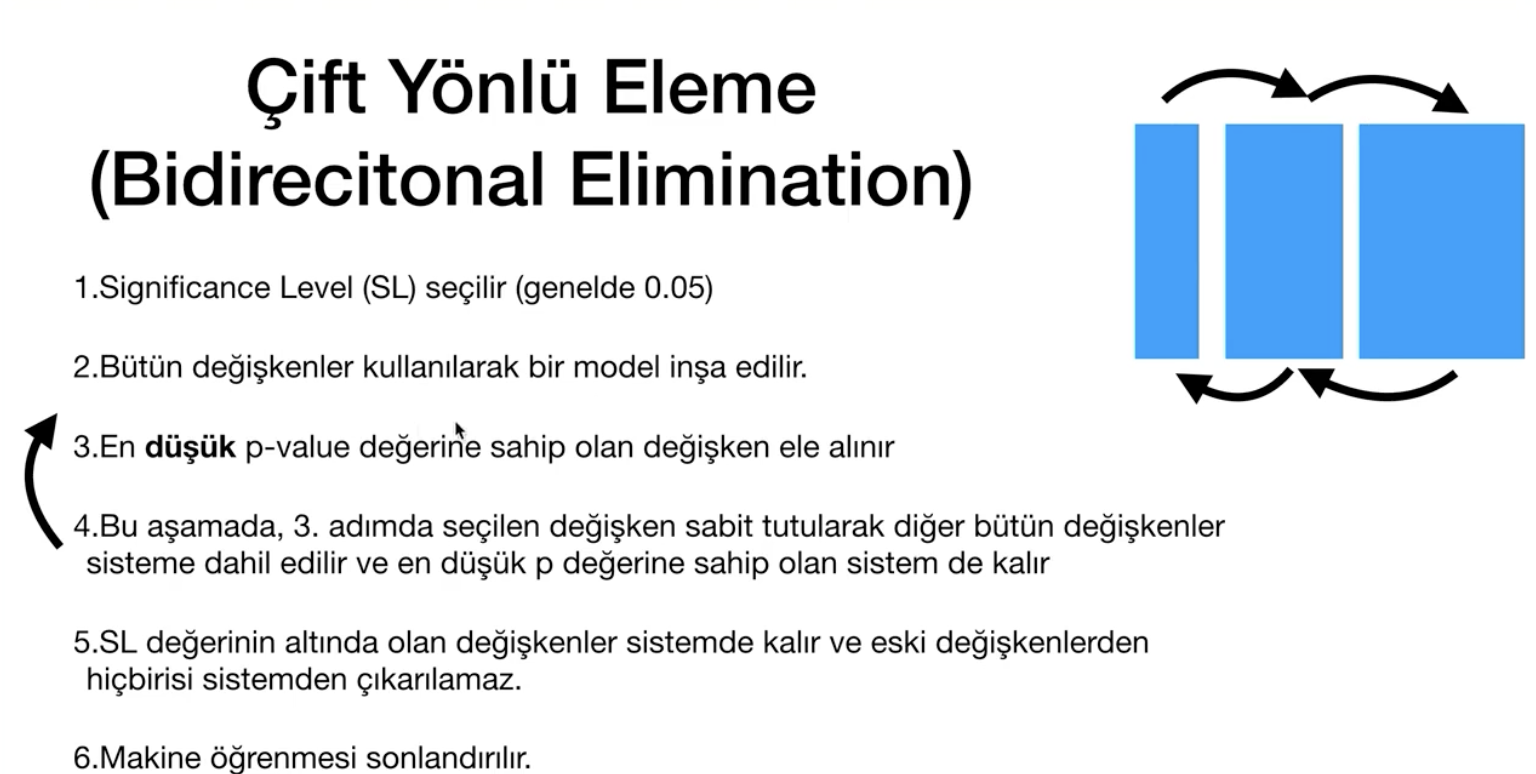

---
- Skor Karşılaştırmasında ise kaba kuvvet olarak bütün yöntemler denenir.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("veriler.csv")
df

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [6]:
# Öncelikle ülkeler ve cinsiyet kısmını encoding olarak çevirip makinenin anlayacağı hale getirilir.
# O sütunlar alınmayabilirdi ama modeli oluştururken o sütunların da etkisini inceleyelim.

country = df.iloc[:,0:1].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# ülkeler sütunundaki değerlere sırasıyla sayısal değer atıyor.
country[:,0] = le.fit_transform(df.iloc[:,0])

# atanan sayısal değerleri bi matrise dönüştürüyor
ohe = preprocessing.OneHotEncoder()
country = ohe.fit_transform(country).toarray()
country

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [7]:
# aynısı cinsiyet için

gender = df.iloc[:,-1:].values

gender[:,-1] = le.fit_transform(df.iloc[:,-1])

# atanan sayısal değerleri bi matrise dönüştürüyor
ohe = preprocessing.OneHotEncoder()
gender = ohe.fit_transform(gender).toarray()
gender



array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [8]:
# yeni sütunları tabloya ekleme

countryCol = pd.DataFrame(data=country, index=range(len(df)), columns=["fr", "tr", "us"])
countryCol

,fr,tr,us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [9]:
otherCol = pd.DataFrame(data=df[["boy","kilo","yas"]], index=range(len(df)), columns=["boy", "kilo", "yas"])
otherCol

,boy,kilo,yas
0,130,30,10
1,125,36,11
2,135,34,10
3,133,30,9
4,129,38,12
5,180,90,30
6,190,80,25
7,175,90,35
8,177,60,22
9,185,105,33


In [52]:
# dummy variable tuzağına düşmemek için cinsiyetin tek sütununu alırız
# tek sütun iki sütun işlevi görüyor
# 1:e, 0:k
genderCol = pd.DataFrame(data=gender[:,:1], index=range(len(df)), columns=["cinsiyet"])
genderCol

,cinsiyet
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


In [54]:
mergedCountry = pd.concat([countryCol, otherCol], axis=1)
mergedAll = pd.concat([mergedCountry, genderCol], axis=1)
mergedAll

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [55]:
# train, test dataları oluşturulur
# amacımı cinsiyeti tahmin etmek

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mergedCountry, genderCol, test_size=0.33, random_state=0)

In [56]:
print(x_train)
print(y_train)

     fr   tr   us  boy  kilo  yas
8   0.0  1.0  0.0  177    60   22
6   0.0  1.0  0.0  190    80   25
16  1.0  0.0  0.0  193    90   23
4   0.0  1.0  0.0  129    38   12
2   0.0  1.0  0.0  135    34   10
5   0.0  1.0  0.0  180    90   30
17  1.0  0.0  0.0  187    80   27
9   0.0  0.0  1.0  185   105   33
7   0.0  1.0  0.0  175    90   35
18  1.0  0.0  0.0  183    88   28
3   0.0  1.0  0.0  133    30    9
0   0.0  1.0  0.0  130    30   10
15  1.0  0.0  0.0  174    70   47
12  0.0  0.0  1.0  160    58   39
    cinsiyet
8        0.0
6        1.0
16       1.0
4        1.0
2        0.0
5        1.0
17       1.0
9        1.0
7        1.0
18       1.0
3        0.0
0        1.0
15       1.0
12       0.0


In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [58]:
# cinsiyeti tahmin etme
y_predict = regressor.predict(x_test)
y_predict

array([[ 0.98720204],
       [-0.12036863],
       [ 0.05009703],
       [ 0.07137418],
       [ 0.72473935],
       [ 0.64615044],
       [-0.03567453],
       [ 0.32612171]])

In [59]:
# boyu tahmin etme
# öncelikle boy sütununu ayırmamız gerek, onu traine vereceğiz (y)

mergedAll

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [60]:
heightCol = mergedAll["boy"].values
heightCol

array([130, 125, 135, 133, 129, 180, 190, 175, 177, 185, 165, 155, 160,
       162, 167, 174, 193, 187, 183, 159, 164, 166])

In [61]:
removedHeightCol = mergedAll.drop(["boy"], axis=1)
removedHeightCol

,fr,tr,us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30,10,1.0
1,0.0,1.0,0.0,36,11,1.0
2,0.0,1.0,0.0,34,10,0.0
3,0.0,1.0,0.0,30,9,0.0
4,0.0,1.0,0.0,38,12,1.0
5,0.0,1.0,0.0,90,30,1.0
6,0.0,1.0,0.0,80,25,1.0
7,0.0,1.0,0.0,90,35,1.0
8,0.0,1.0,0.0,60,22,0.0
9,0.0,0.0,1.0,105,33,1.0


In [62]:
# eğitim

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(removedHeightCol, heightCol, test_size=0.33, random_state=0)
x_train

,fr,tr,us,kilo,yas,cinsiyet
8,0.0,1.0,0.0,60,22,0.0
6,0.0,1.0,0.0,80,25,1.0
16,1.0,0.0,0.0,90,23,1.0
4,0.0,1.0,0.0,38,12,1.0
2,0.0,1.0,0.0,34,10,0.0
5,0.0,1.0,0.0,90,30,1.0
17,1.0,0.0,0.0,80,27,1.0
9,0.0,0.0,1.0,105,33,1.0
7,0.0,1.0,0.0,90,35,1.0
18,1.0,0.0,0.0,88,28,1.0


In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [64]:
# boy tahminleri
y_predict = regressor.predict(x_test)
print(y_test)
y_predict

[164 165 167 162 125 166 155 159]


array([182.26638686, 152.87161474, 162.79386375, 158.30668577,
       130.82888952, 173.96138408, 150.12782663, 157.26898922])

In [67]:
# modelin başarısı için

import statsmodels.api as sm

# bütün değişkenleri bir diziye atıp sırasıyla hepsi denenir
# p-value değerleri yani sistemi bozanları sırasıyla çıkarılır

# Beta0 değerleri için hepsine 1 ekliyorum
X = np.append(arr = np.ones((len(df),1)).astype(int), values=removedHeightCol, axis=1)

XList = removedHeightCol.iloc[:,[0,1,2,3,4,5]].values
XList = np.array(XList, dtype=float)
model = sm.OLS(heightCol,XList).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           5.41e-07
Time:                        11:43:46   Log-Likelihood:                -73.950
No. Observations:                  22   AIC:                             159.9
Df Residuals:                      16   BIC:                             166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           114.0688      8.145     14.005      0.0

In [68]:
# x5'in p-value'si en büyük(0.717) olduğu için onu elememiz gerekli

XList = removedHeightCol.iloc[:,[0,1,2,3,5]].values
XList = np.array(XList, dtype=float)
model = sm.OLS(heightCol,XList).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           9.32e-08
Time:                        11:45:49   Log-Likelihood:                -74.043
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      17   BIC:                             163.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           115.6583      6.734     17.175      0.0

In [69]:
# x5'in p-value'si aslında kabul edilebilir(0.031) ama onu da eleyip daha iyi bir sonuç bulmaya çalışalım

XList = removedHeightCol.iloc[:,[0,1,2,3]].values
XList = np.array(XList, dtype=float)
model = sm.OLS(heightCol,XList).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     33.16
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.52e-07
Time:                        11:47:26   Log-Likelihood:                -77.131
No. Observations:                  22   AIC:                             162.3
Df Residuals:                      18   BIC:                             166.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           119.8136      7.265     16.491      0.0

In [70]:
# çıkan sonuca göre ülkeler ve yas sütunları daha iyi bir sonuç verebilir
XList

array([[  0.,   1.,   0.,  30.],
       [  0.,   1.,   0.,  36.],
       [  0.,   1.,   0.,  34.],
       [  0.,   1.,   0.,  30.],
       [  0.,   1.,   0.,  38.],
       [  0.,   1.,   0.,  90.],
       [  0.,   1.,   0.,  80.],
       [  0.,   1.,   0.,  90.],
       [  0.,   1.,   0.,  60.],
       [  0.,   0.,   1., 105.],
       [  0.,   0.,   1.,  55.],
       [  0.,   0.,   1.,  50.],
       [  0.,   0.,   1.,  58.],
       [  0.,   0.,   1.,  59.],
       [  0.,   0.,   1.,  62.],
       [  1.,   0.,   0.,  70.],
       [  1.,   0.,   0.,  90.],
       [  1.,   0.,   0.,  80.],
       [  1.,   0.,   0.,  88.],
       [  1.,   0.,   0.,  40.],
       [  1.,   0.,   0.,  66.],
       [  1.,   0.,   0.,  56.]])

In [73]:
backwardDf = mergedAll.iloc[:,[0,1,2,3]].values

array([[  0.,   1.,   0., 130.],
       [  0.,   1.,   0., 125.],
       [  0.,   1.,   0., 135.],
       [  0.,   1.,   0., 133.],
       [  0.,   1.,   0., 129.],
       [  0.,   1.,   0., 180.],
       [  0.,   1.,   0., 190.],
       [  0.,   1.,   0., 175.],
       [  0.,   1.,   0., 177.],
       [  0.,   0.,   1., 185.],
       [  0.,   0.,   1., 165.],
       [  0.,   0.,   1., 155.],
       [  0.,   0.,   1., 160.],
       [  0.,   0.,   1., 162.],
       [  0.,   0.,   1., 167.],
       [  1.,   0.,   0., 174.],
       [  1.,   0.,   0., 193.],
       [  1.,   0.,   0., 187.],
       [  1.,   0.,   0., 183.],
       [  1.,   0.,   0., 159.],
       [  1.,   0.,   0., 164.],
       [  1.,   0.,   0., 166.]])

In [74]:
# eğitim

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(backwardDf, heightCol, test_size=0.33, random_state=0)

array([[  0.,   1.,   0., 177.],
       [  0.,   1.,   0., 190.],
       [  1.,   0.,   0., 193.],
       [  0.,   1.,   0., 129.],
       [  0.,   1.,   0., 135.],
       [  0.,   1.,   0., 180.],
       [  1.,   0.,   0., 187.],
       [  0.,   0.,   1., 185.],
       [  0.,   1.,   0., 175.],
       [  1.,   0.,   0., 183.],
       [  0.,   1.,   0., 133.],
       [  0.,   1.,   0., 130.],
       [  1.,   0.,   0., 174.],
       [  0.,   0.,   1., 160.]])

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

# boy tahminleri
# %100 doğruluk çıktı, normal değil ama bu durum 4 sütundaki p-value 0 olduğu için
y_predict = regressor.predict(x_test)
print(y_test)
y_predict

[164 165 167 162 125 166 155 159]


array([164., 165., 167., 162., 125., 166., 155., 159.])